# Пробежимся по метрикам

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## init

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import make_classification, make_friedman1, make_blobs
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics


%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (17,8)
plt.style.use('ggplot')

np.random.seed(42)

## Бинарная классификация

In [58]:
X, y = make_classification(n_classes=2, random_state=42)

X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.5, random_state=42)

In [19]:
model = ensemble.RandomForestClassifier()

model = model.fit(X_train, y_train)

### predict labels

In [20]:
y_pred = model.predict(X_test)

In [21]:
# accuracy
check = metrics.accuracy_score(y_true, y_pred)

test = (y_pred == y_true).sum() / y_true.shape[0]

test, check

(0.94, 0.94)

Плохо работает при сильном дисбалансе: если у нас 99% нулей, то предсказав 100% нулей мы получим accuracy = 0.99

In [22]:
# precision
check = metrics.precision_score(y_true, y_pred)

test = ((y_pred + y_true) == 2).sum() / y_pred.sum()

test, check

(0.9259259259259259, 0.9259259259259259)

TP/(TP+FP), правильные единички ко всем _предсказанным_ единичкам

In [23]:
# recall
check = metrics.recall_score(y_true, y_pred)

test = ((y_pred + y_true) == 2).sum() / y_true.sum()

test, check

(0.9615384615384616, 0.9615384615384616)

TP/(TP+FN), правильные единички ко всем _истинным_ единичкам

In [26]:
# F-beta
beta = 1.5

check = metrics.fbeta_score(y_true, y_pred, beta=beta)

precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)

test = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

test, check

(0.9502923976608186, 0.9502923976608186)

Параметр `beta` $\in (0, +\inf)$ - определяет вес _recall_'а:  
* `beta < 1` - _precision_ тяжелее _recall_;  
* `beta > 1` - _recall_ тяжелее _precision_;    
* `beta = 1` - _precision_ и _recall_ весят поровну, это $F_1$-скор;    

In [28]:
# F1
check = metrics.f1_score(y_true, y_pred)

test = 2 * (precision * recall) / (precision + recall)

test, check

(0.9433962264150944, 0.9433962264150944)

Это зовётся _средним гармоническим_ (_precision_ и _recall_)

### predict proba

In [60]:
y_pred = model.predict_proba(X_test)[:, 1] # вероятность 1

In [35]:
# log_loss
check = metrics.log_loss(y_true, y_pred)

test = np.sum(
    -1 * (y_true*np.log(y_pred) + (1 - y_true)*np.log(1 - y_pred))
) / y_true.shape[0]

test, check

(0.3090690352663913, 0.3090690352663913)

Не метрика, а лосс. Но важно знать и понимать!

In [69]:
# ROC AUC
check = metrics.roc_auc_score(y_true, y_pred)

thresholds = np.sort(y_pred)[::-1] # нам нужна сортировка по убыванию

fpr = []
tpr = []
for v in thresholds:
    label_predict = y_pred >= v # предсказываем единички всем, у кого вероятность больше v
    
    fpr.append(np.sum(
        label_predict > y_true # FP's (т.е. нолики, ошибочно названные единичками)
    ) / (y_true == 0).sum()) # to all real negatives (ко всем [истинным] ноликам)
    
    tpr.append(np.sum(
        (label_predict + y_true) == 2 # TP's (т.е. единички, правильно названные единичками)
    ) / y_true.sum()) # to all real positives (ко всем [истинным] единичкам)

test = metrics.auc( # лень считать площадь
    x=fpr, # FPR по оси X
    y=tpr  # TPR по оси Y
)

test, check

(0.9815705128205128, 0.9815705128205129)

Непросто, конечно. Но мы понимаем что? Что чем более выпукла кривая, чем больше ROC AUC, тем лучше "разделяющая способность", т.е. тем лучше наша модель отделяет нолики от единиц: единицы получают большую вероятность, а нолики - маленькую.  

Вот как это выглядит:

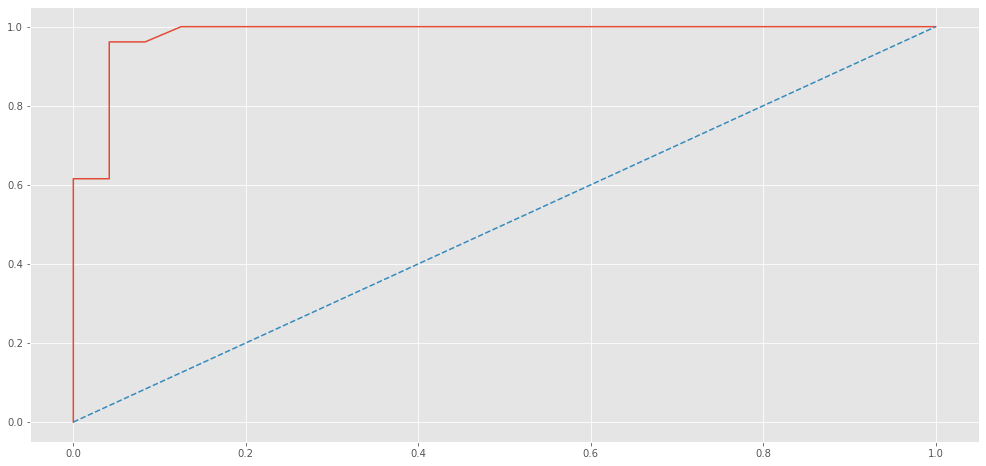

In [62]:
ax = plt.axes()

ax.plot([0]+fpr, [0]+tpr)
ax.plot([0, 1], [0,1], linestyle='--')
plt.show();

## Регрессия

In [6]:
X, y = make_friedman1(random_state=42)

X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.5, random_state=42)

In [7]:
model = ensemble.RandomForestRegressor()

model = model.fit(X_train, y_train)

In [8]:
y_pred = model.predict(X_test)

In [19]:
# R2, коэффициент детерминации
check = metrics.r2_score(y_true, y_pred)

test1 = 1 - (
    ((y_true - y_pred)**2).sum() / ((y_true - y_true.mean())**2).sum()
)

test, check

(0.6902447944453722, 0.6902447944453722)